# Oxford IIIT Pet 🐕🐈
google colab link: https://colab.research.google.com/drive/1digSdB9oJ_XPbFDB47OiNSRj0HCPGFId?usp=sharing

This notebook is working with the Oxford-IIIT pet dataset. It is a  a 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

link: https://www.robots.ox.ac.uk/~vgg/data/pets/


Our objective is to achieve the capability of extracting three key components from an input image:
1. A segmented mask
2. The identification of the species (cat or dog)

###1.Getting our data
Each image have 3 features:
  1. Mask
  2. Specie "cat or dog"
  3. Class "type either cat or dog"
The masks contains 3 classes:
1. Pixel belonging to the pet
2. Pixel bordering the pet
3. None of the above. "A surronding pixel"

In [3]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-_0p_zwrt
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-_0p_zwrt
  Resolved https://github.com/tensorflow/examples.git to commit 0bbf4fe43fbf41b7174b9ce4a64d69bd33aadd21
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1689703202.67065300351684276117070052891639684042406419745-py3-none-any.whl size=301554 sha256=d3a99ed5489de0ec0245c32c11bf9d320597965f66f410cd7cea8ebcf018ca84
  Stored in directory: /tmp/pip-ephem-wheel-cache-mrkmxo1g/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [4]:
# imports
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from IPython.display import clear_output
from tensorflow_examples.models.pix2pix import pix2pix

In [5]:
# Limiting our gpu memory usage to prevent errors
physical_device = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_device[0] , True)
except:
  pass

In [6]:
# Getting our data
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)
len(dataset) , info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteZFFKZZ/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteZFFKZZ/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


(2,
 tfds.core.DatasetInfo(
     name='oxford_iiit_pet',
     full_name='oxford_iiit_pet/3.2.0',
     description="""
     The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
     images for each class. The images have large variations in scale, pose and
     lighting. All images have an associated ground truth annotation of breed.
     """,
     homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
     data_path=PosixGPath('/tmp/tmpje6s4u1ctfds'),
     file_format=tfrecord,
     download_size=773.52 MiB,
     dataset_size=774.69 MiB,
     features=FeaturesDict({
         'file_name': Text(shape=(), dtype=string),
         'image': Image(shape=(None, None, 3), dtype=uint8),
         'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
         'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
         'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
     }),
     supervised_keys=('image', 'label'),
     disable_shuffling=Fa

In [7]:
# Class Names
class_names = info.features['label'].names
class_names

['Abyssinian',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'boxer',
 'British_Shorthair',
 'chihuahua',
 'Egyptian_Mau',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'Maine_Coon',
 'miniature_pinscher',
 'newfoundland',
 'Persian',
 'pomeranian',
 'pug',
 'Ragdoll',
 'Russian_Blue',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'Siamese',
 'Sphynx',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [8]:
# Species
species_name = info.features['species'].names
species_name

['Cat', 'Dog']

In [9]:
# Getting our train data and our test data
train_data = dataset['train']
test_data = dataset['test']

In [10]:
print(train_data)

<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


###2.Knowing our

In [ ]:
# Length of our training and testing data
len(train_data) , len(test_data)

(3680, 3669)

In [ ]:
s = train_data.take(1)
for samp in s:
  imag = samp['image']
  mask = samp['segmentation_mask']
  print(tf.reduce_max(imag) , tf.reduce_min(imag))
  print('~' * 100)
  print(tf.reduce_max(mask) , tf.reduce_min(mask))
  print('~' * 100)
  print(imag)
  print('~' * 100)
  print(mask)

tf.Tensor(255, shape=(), dtype=uint8) tf.Tensor(0, shape=(), dtype=uint8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tf.Tensor(3, shape=(), dtype=uint8) tf.Tensor(1, shape=(), dtype=uint8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tf.Tensor(
[[[ 3  3  3]
  [ 5  3  4]
  [ 7  5  6]
  ...
  [ 3  1  2]
  [ 3  1  2]
  [ 3  1  2]]

 [[ 4  3  1]
  [ 5  3  4]
  [ 5  3  4]
  ...
  [ 6  2  3]
  [ 7  3  4]
  [ 8  4  5]]

 [[ 4  3  1]
  [ 5  4  2]
  [ 5  3  4]
  ...
  [ 7  3  2]
  [ 8  4  3]
  [ 8  4  3]]

 ...

 [[ 6 10 11]
  [ 6  7  9]
  [ 7  8 10]
  ...
  [ 3  4  6]
  [ 3  4  6]
  [ 4  5  7]]

 [[ 8 12 13]
  [ 7  8 10]
  [ 8  9 11]
  ...
  [ 4  5  9]
  [ 4  5  7]
  [ 4  5  7]]

 [[ 8 12 13]
  [ 7  8 10]
  [ 8  9 11]
  ...
  [ 5  6 10]
  [ 5  6 10]
  [ 5  6 10]]], shape=(500, 500, 3), dtype=uint8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

So it seems our images are not normalized and our masks have a max values of 3 and a min of 1 , which is what we know as there is 3 classes

In [ ]:
# Viewing a data sample
sample = train_data.take(3)
for one_sample in sample:
  image = one_sample['image']
  label = one_sample['label']
  mask = one_sample['segmentation_mask']
  species = one_sample['species']
  print(f"""
  Image size: {image.shape}
  Mask: {mask.shape}
  label : {label}
  species: {species}
  """)


  Image size: (500, 500, 3)
  Mask: (500, 500, 1)
  label : 33
  species: 0
  

  Image size: (313, 500, 3)
  Mask: (313, 500, 1)
  label : 12
  species: 1
  

  Image size: (500, 333, 3)
  Mask: (500, 333, 1)
  label : 9
  species: 0
  


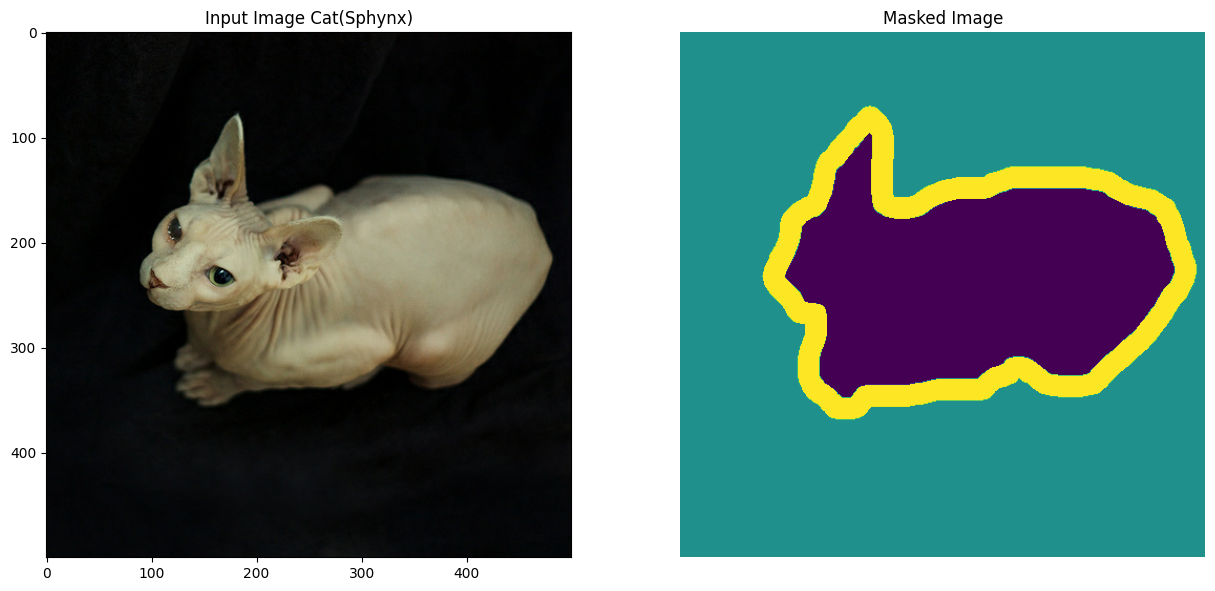

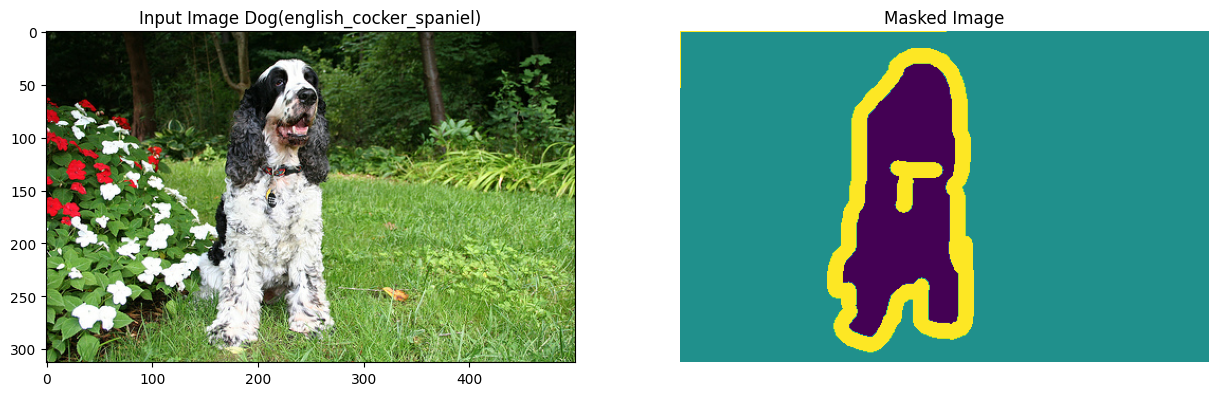

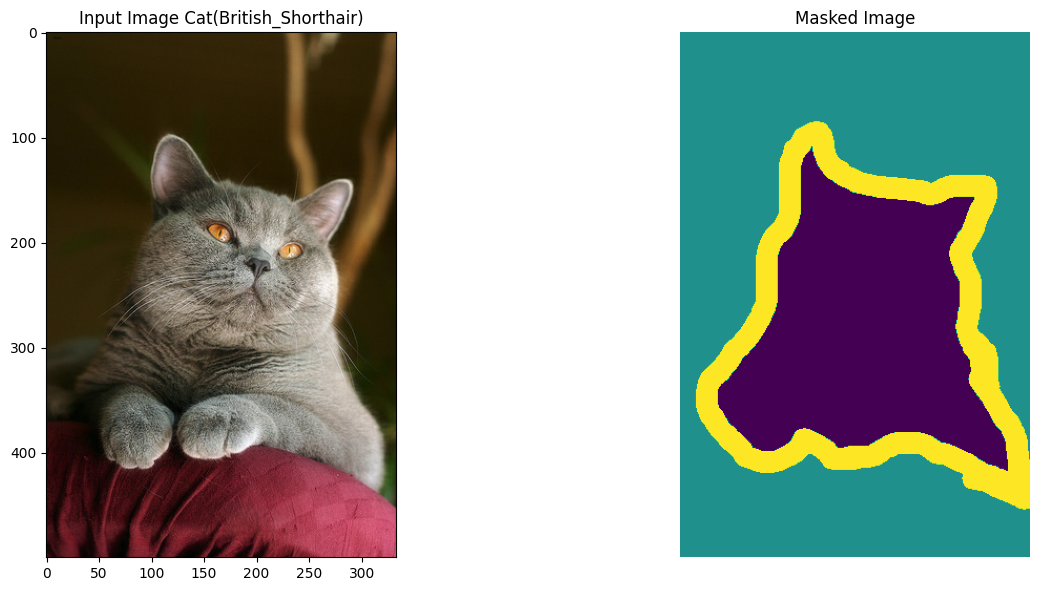

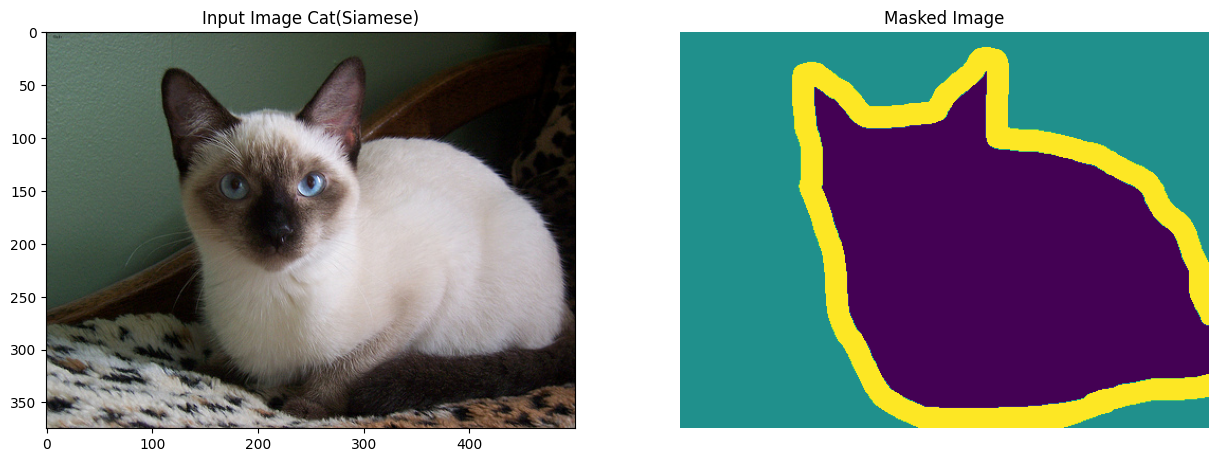

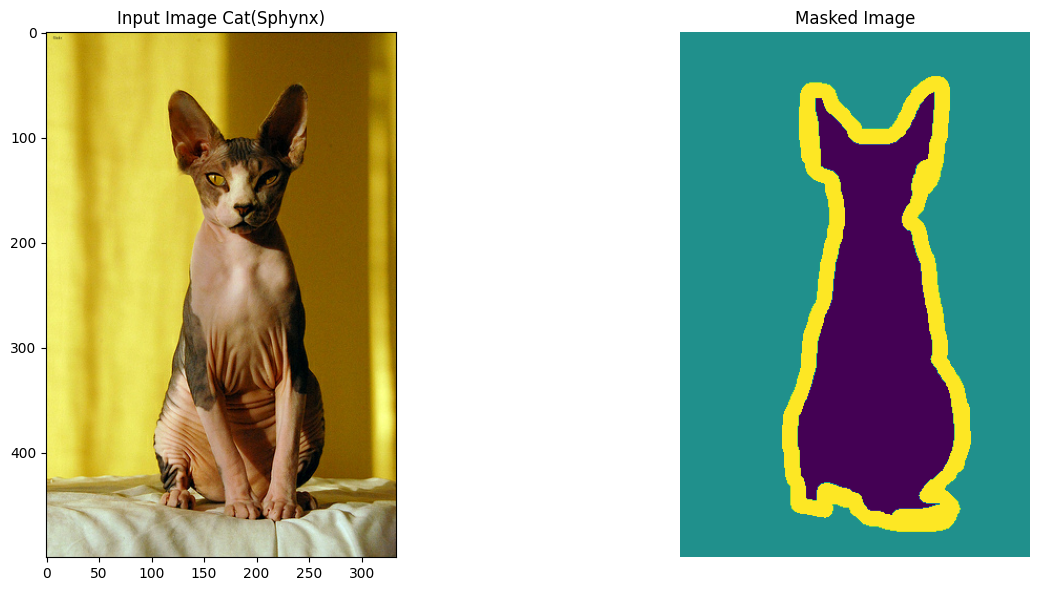

In [ ]:
# Viewing some images and masks
samples = train_data.take(5)
i = 1
for one_sample in samples:
  image = one_sample['image']
  label = one_sample['label']
  mask = one_sample['segmentation_mask']
  species = one_sample['species']
  title = ['Input Image', 'True Mask', 'Predicted Mask']
  plt.figure(figsize=(15, 15))
  plt.subplot(2, 2 , 1)
  plt.title(f'Input Image {species_name[species]}({class_names[label]})')
  plt.imshow(image)
  plt.subplot(2, 2 , 2)
  i += 2
  plt.title(f'Masked Image')
  plt.imshow(mask)
  plt.axis('off')
plt.show()

##Segmentation

###3.Preparing our Segmentation pipelines
Creating our data pipelines

In [31]:
# Declaring some constants
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

In [32]:
# Creating our mapping methods
def normalize(img, mask):
  img = tf.cast(img , tf.float32) / 255.0
  mask -= 1 # Just for convenience
  return img , mask

def process_image(data):
  img = data['image']
  img = tf.image.resize(img , (128 , 128))
  mask = data['segmentation_mask']
  mask = tf.image.resize(mask , (128, 128), method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  img, mask = normalize(img, mask)
  return img, mask

In [33]:
# Creating a data augmentation class
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

- Why did we make the above class and didn't make a layer in the model?
  - due to the fact that we need to augment the input and the label together.

In [34]:
# Creating our pipeline
train_seg_pipe = (train_data.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
                .cache()
                .shuffle(BUFFER_SIZE)
                .batch(BATCH_SIZE)
                .repeat()
                .map(Augment())
                .prefetch(buffer_size=tf.data.AUTOTUNE))

test_seg_pipe = (test_data.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
                .batch(BATCH_SIZE))


###4.Creating our model
The model being used here is a modified U-Net. A U-Net consists of 2 models, an encoder and decoder.

Our 2 models will be:
1. MobileNetV2 --> Encoder
2. Pix2Pix Upsampling blocks --> Decoder

A skip connection will be created between some of the mobilenetv2's layers and decoder's layers

In [22]:
# Getting mobilenetv2
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=[128,128,3], include_top=False)
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [23]:
# Creating model
from tensorflow.keras import Model

# for skip connections
layer_names = [
    'block_1_expand_relu',
    'block_3_expand_relu',
    'block_6_expand_relu',
    'block_13_expand_relu',
    'block_16_project',
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

encoder = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

encoder.trainable = False

In [24]:
decoder = [
    pix2pix.upsample(512, 3),
    pix2pix.upsample(256, 3),
    pix2pix.upsample(128, 3),
    pix2pix.upsample(64, 3),
]

In [25]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  skips = encoder(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  for up, skip in zip(decoder, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

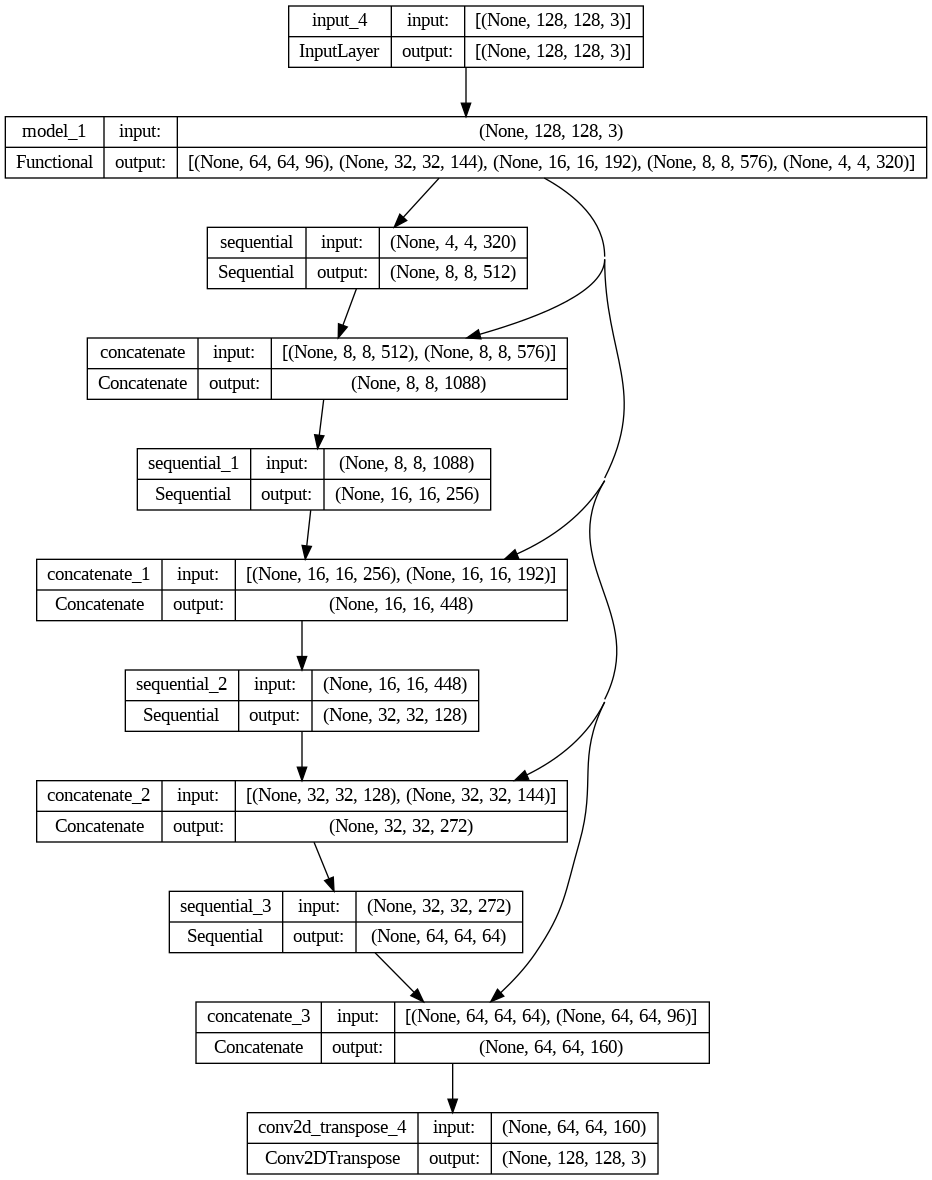

In [26]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True)


In [35]:
# Creating a display function
for images, masks in train_seg_pipe.take(2):
  sample_image, sample_mask = images[0], masks[0]

def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 11s 11s/step


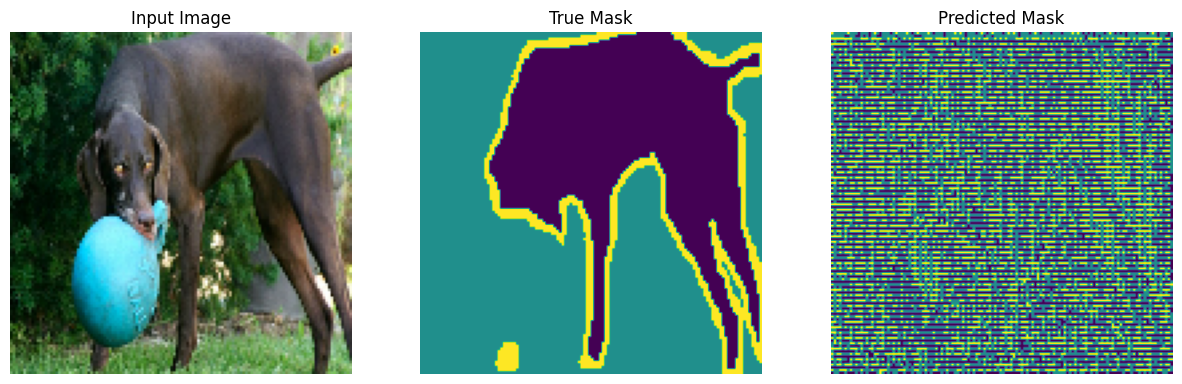

In [ ]:
# Viewing an example before training our model
show_predictions()

In [ ]:
# Creating a callback to view how our model is improving while training
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

1/1 [==============================] - 0s 23ms/step


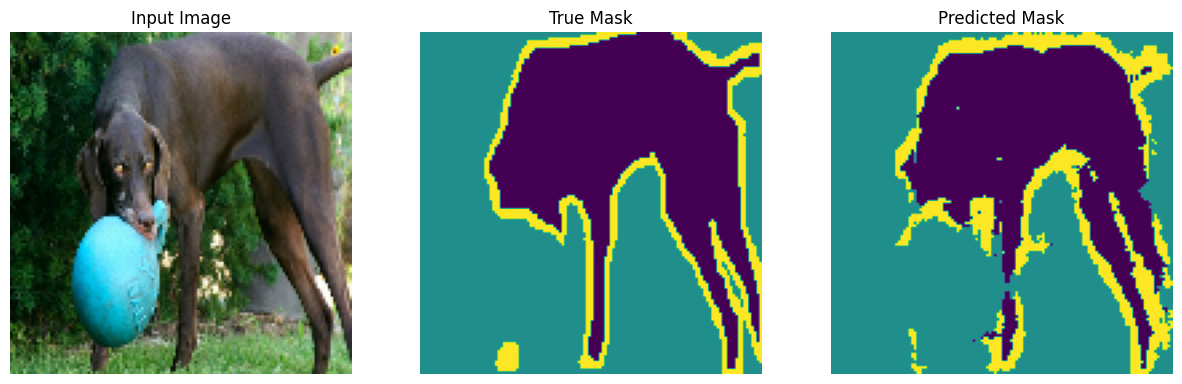


Sample Prediction after epoch 20

57/57 [==============================] - 13s 227ms/step - loss: 0.1763 - accuracy: 0.9281 - val_loss: 0.2674 - val_accuracy: 0.9027


In [ ]:
# Fitting our model
history_seg = model.fit(train_seg_pipe,
                        epochs=EPOCHS,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_data=test_seg_pipe,
                        validation_steps=VALIDATION_STEPS,
                        callbacks=[DisplayCallback()])

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/ImageSegmentation/"
# os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model.save_weights(save_dir)

# reloding our model and testing
loaded_model = unet_model(output_channels=OUTPUT_CLASSES)
loaded_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
loaded_model.load_weights(save_dir)
loaded_model.evaluate(test_seg_pipe)

58/58 [==============================] - 18s 270ms/step - loss: 0.2631 - accuracy: 0.9029


[0.2630726099014282, 0.9029054045677185]

In [19]:
# plot loss curves function
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs , loss , label = 'training_loss')
  plt.plot(epochs , val_loss , label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

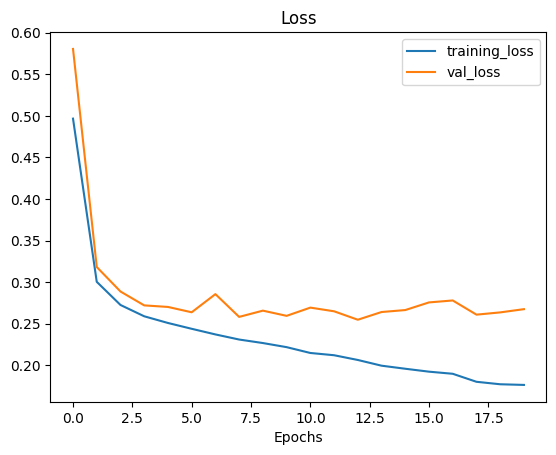

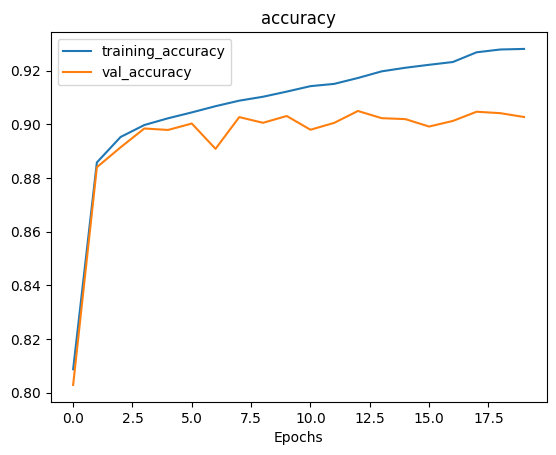

In [ ]:
plot_loss_curves(history_seg)

It seems our model is doing pretty good. However, some overfitting can be observed

2/2 [==============================] - 0s 41ms/step


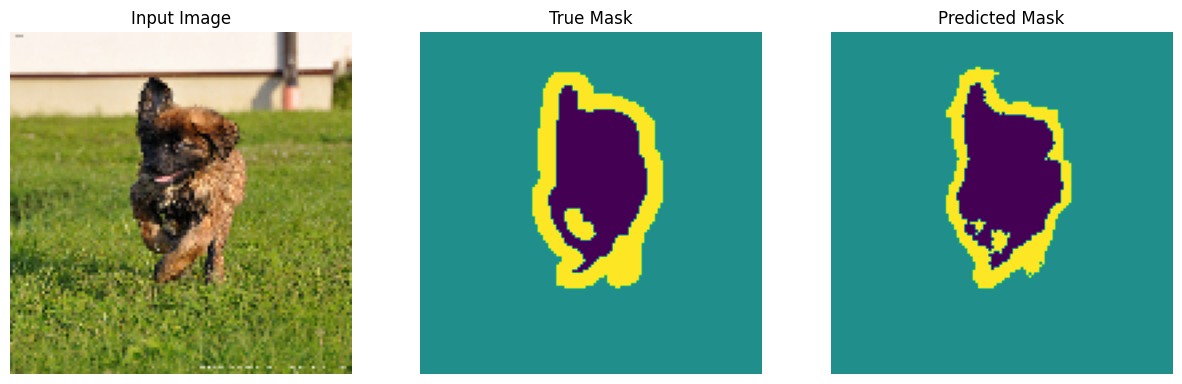

2/2 [==============================] - 0s 37ms/step


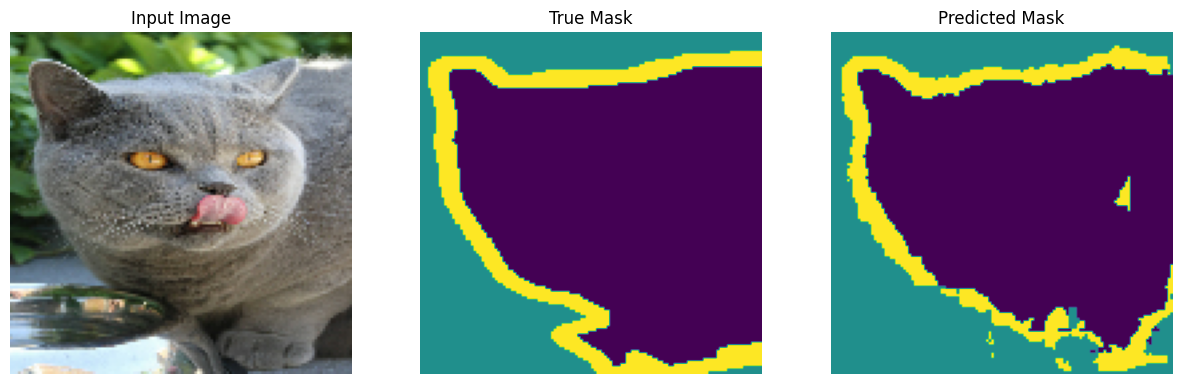

2/2 [==============================] - 0s 43ms/step


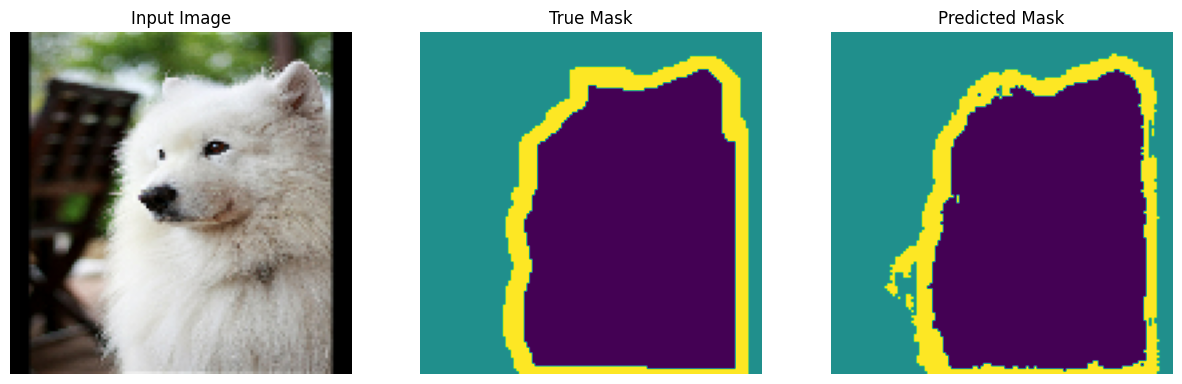

In [ ]:
# Show some preditions
show_predictions(test_seg_pipe, 3)

🔑Note: As sementatic segmentation datasets are highly imbalanced we can make weigh classes to be used in the loss function to compensate the imbalance.

###5.Testing Segmentation on our custom data

In [ ]:
def load_prep_plot_image_mask(model, filename, img_shape = 128):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  mask = create_mask(model.predict(tf.expand_dims(img, axis = 0)))
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title("Image")
  plt.subplot(1,2,2)
  print(mask.shape)
  plt.imshow(mask)
  plt.title("Mask")
  plt.axis(False)
  plt.show();

1/1 [==============================] - 0s 35ms/step
(128, 128, 1)


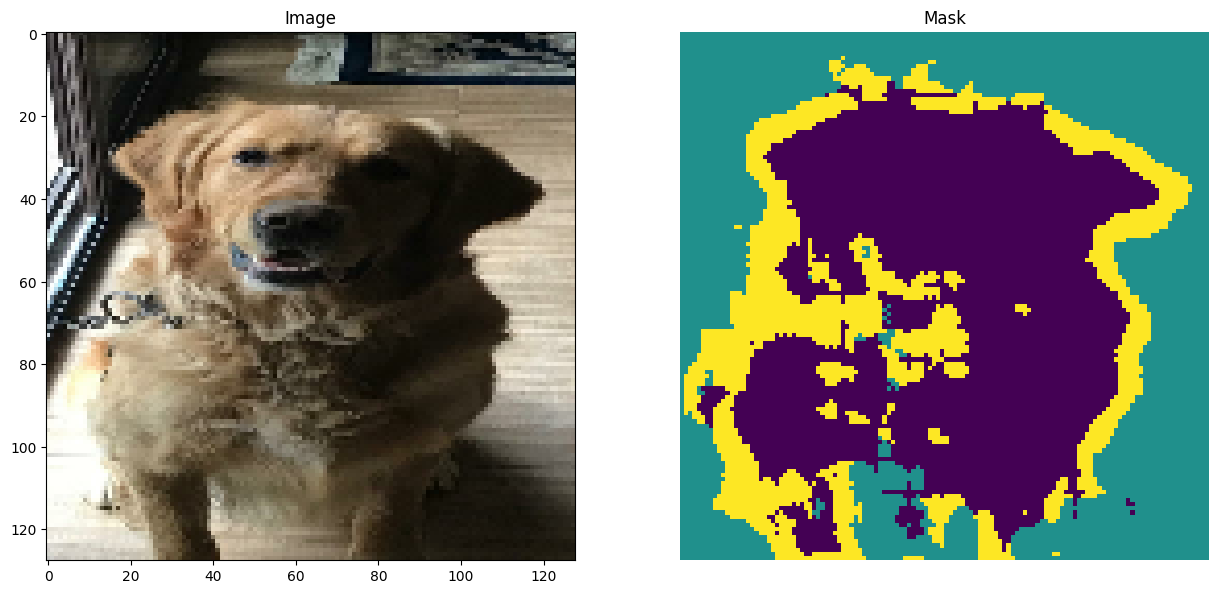

In [ ]:
load_prep_plot_image_mask(model, '/content/pluto.jpeg')

Our model managed to separate Pluto, but it struggled because the floor and the dog share similar colors. Let's test with a different picture.

1/1 [==============================] - 0s 23ms/step
(128, 128, 1)


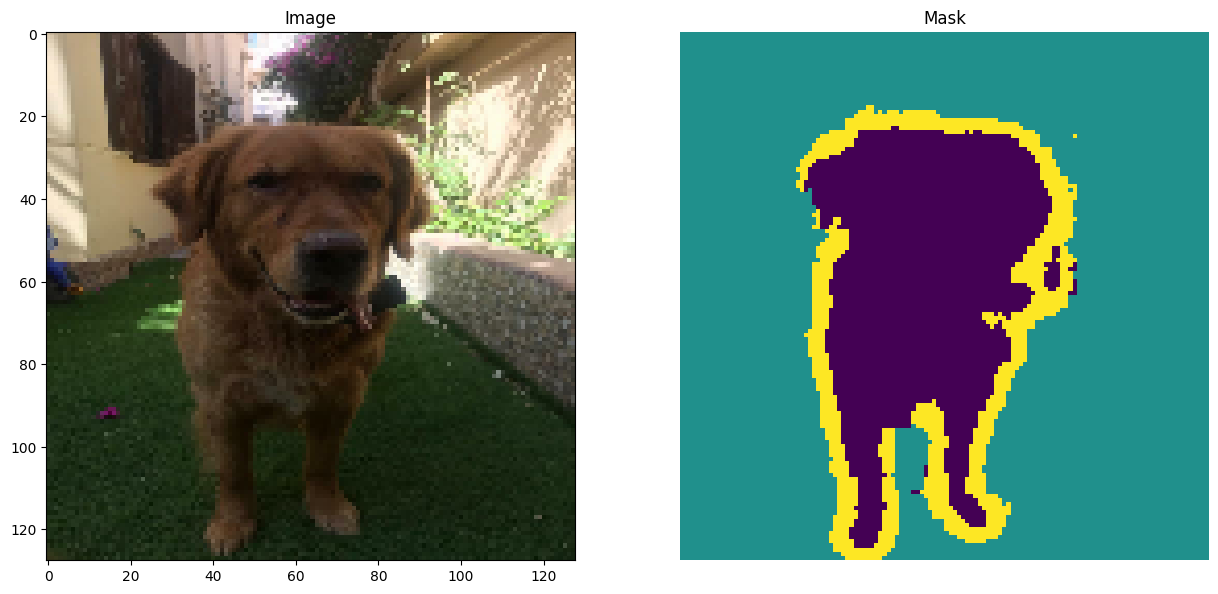

In [ ]:
load_prep_plot_image_mask(model, '/content/pluto2.jpeg')

Our model is doing a great job, even accurately capturing details like the legs.

## Classification 🐈 or 🐕

###3.Preparing our pipelines

In [11]:
# Declaring some constants
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

In [12]:
# Declaring our map functions
def process_image_classification_1(data):
  img = data['image']
  img = tf.image.resize(img, (128, 128))
  img = tf.cast(img, tf.float32) # no need for scaling as efficient net has a scaling layer
  species = data['species']
  return img, species

In [13]:
# Creating our pipelines
train_class1_pipe = (train_data.map(process_image_classification_1, num_parallel_calls=tf.data.AUTOTUNE)
                    .cache()
                    .shuffle(BUFFER_SIZE)
                    .batch(BATCH_SIZE)
                    .repeat()
                    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_class1_pipe = (test_data.map(process_image_classification_1,  num_parallel_calls=tf.data.AUTOTUNE)
                    .batch(BATCH_SIZE))

###4.Creating our dog cat classification model
We will use transfer learning in this section. "EfficientNet"

In [14]:
# Creating our data augmentation layer
from tensorflow.keras import layers, Sequential
data_aug = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Resizing(height = 128 , width = 128 , interpolation = 'bilinear')
], name = 'data_augmentation')

In [15]:
# Getting our base model
from tensorflow.keras.applications import EfficientNetB7
base_model = EfficientNetB7(input_shape=[128,128,3], include_top=False)
base_model.trainable = False
base_model.summary()

258076736/258076736 [==============================] - 1s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 128, 128, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Resc

In [16]:
# Creating our model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout


inputs = Input(shape=(128,128,3))

x = data_aug(inputs)
x = base_model(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(1, activation = 'sigmoid')(x)
model_class1 = tf.keras.Model(inputs, output)

model_class1.compile(loss='binary_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

model_class1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, 128, 128, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb7 (Functional  (None, 4, 4, 2560)        64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 40960)             0         
                                                                 
 dense (Dense)               (None, 128)               5243008   
                                                                 
 dropout (Dropout)           (None, 128)               0     

In [17]:
# Fitting our model
history_class_1 = model_class1.fit(train_class1_pipe,
                                    epochs=EPOCHS,
                                    steps_per_epoch=STEPS_PER_EPOCH,
                                    validation_data=test_class1_pipe,
                                    validation_steps=VALIDATION_STEPS)

Epoch 1/20
115/115 [==============================] - 63s 231ms/step - loss: 0.5652 - accuracy: 0.8242 - val_loss: 0.0962 - val_accuracy: 0.9560
Epoch 2/20
115/115 [==============================] - 18s 154ms/step - loss: 0.3499 - accuracy: 0.8582 - val_loss: 0.1116 - val_accuracy: 0.9545
Epoch 3/20
115/115 [==============================] - 18s 155ms/step - loss: 0.2869 - accuracy: 0.8734 - val_loss: 0.0725 - val_accuracy: 0.9730
Epoch 4/20
115/115 [==============================] - 20s 176ms/step - loss: 0.2908 - accuracy: 0.8777 - val_loss: 0.0680 - val_accuracy: 0.9787
Epoch 5/20
115/115 [==============================] - 18s 157ms/step - loss: 0.2685 - accuracy: 0.8851 - val_loss: 0.0700 - val_accuracy: 0.9787
Epoch 6/20
115/115 [==============================] - 20s 178ms/step - loss: 0.2688 - accuracy: 0.8872 - val_loss: 0.0681 - val_accuracy: 0.9787
Epoch 7/20
115/115 [==============================] - 18s 159ms/step - loss: 0.2525 - accuracy: 0.9011 - val_loss: 0.0588 - val_ac

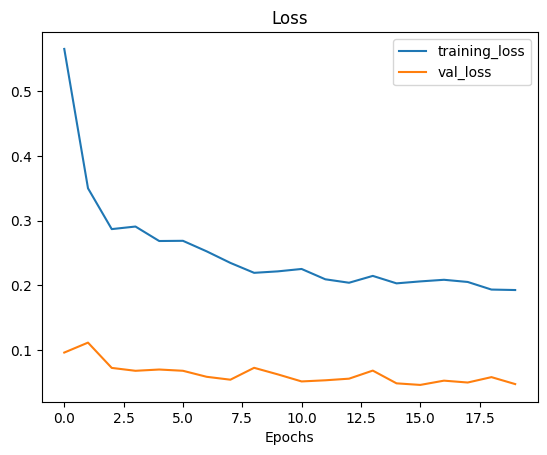

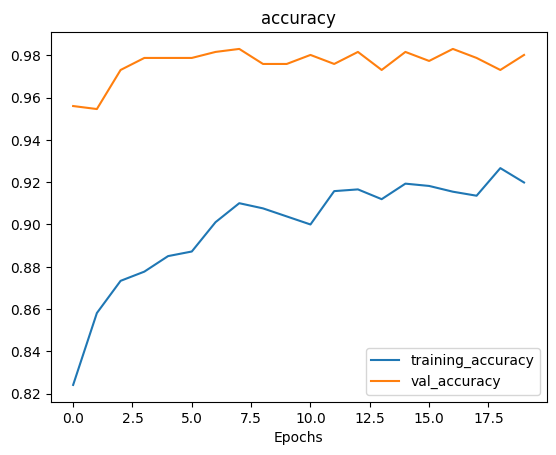

In [20]:
plot_loss_curves(history_class_1)

It seems our model validation accuracy have flattened from the 2nd epoch . However it has an ~98% validation accuracy! However there is a wierd behaviour as our training accuracy is much lower than our test accuracy. However this may be because our training set is harder than our test set. In addition, we are using data augmentaion which make the data harder. Also, we can consider data mismatch, but this is out from our hands.

In [28]:
# Loading our image segmentation model
save_dir = "drive/MyDrive/ComputerVision/ImageSegmentation/"
# reloding our model and testing
loaded_model = unet_model(output_channels=OUTPUT_CLASSES)
loaded_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
loaded_model.load_weights(save_dir)

## Testing both model together on our custom data

1/1 [==============================] - 0s 160ms/step


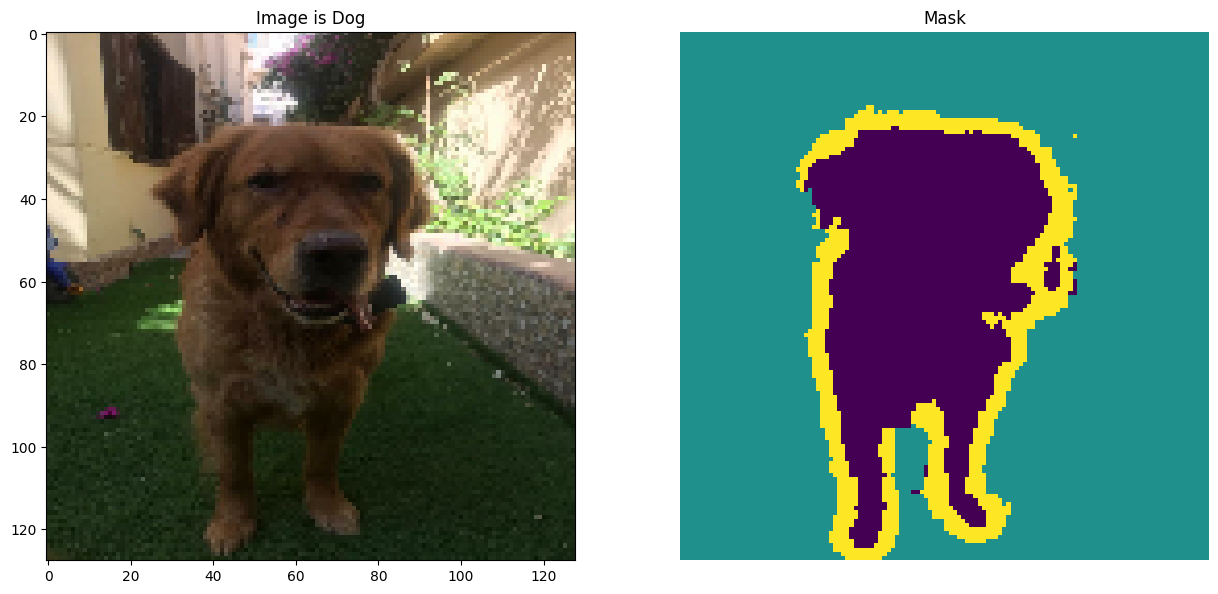

In [44]:
def load_prep_plot_image_mask(model_1, model_2 , filename, img_shape = 128):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  mask = create_mask(model_1.predict(tf.expand_dims(img, axis = 0)))
  specie = model_2.predict(tf.expand_dims(img, axis = 0))
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title(f"Image is {species_name[int(specie)]}")
  plt.subplot(1,2,2)
  plt.imshow(mask)
  plt.title("Mask")
  plt.axis(False)
  plt.show();

load_prep_plot_image_mask(loaded_model, model_class1, '/content/Pluto2.jpeg')

Our model successfully classified the animal type and produced a satisfactory segmentation.